In [8]:
import typing
import random
import numpy as np
import matplotlib.pyplot as plt
from flytekit.remote.remote import FlyteRemote
from flytekit.configuration import Config
from flytekit.models.core.identifier import NodeExecutionIdentifier, WorkflowExecutionIdentifier
from flytekit.extend import TypeEngine
from flytekit import FlyteContextManager

In [10]:
r = FlyteRemote(
    Config.auto(config_file="/Users/ytong/.flyte/dev.yaml"),
    default_project="flytesnacks",
    default_domain="development",
)

In [11]:
node_io = r.client.get_node_execution_data(NodeExecutionIdentifier("n0", WorkflowExecutionIdentifier("flytesnacks", "development", "a646t6c76kvchvh2scld")))

In [12]:
node_io.full_outputs.literals["o0"]

scalar {
  blob {
    metadata {
      type {
        format: "NumpyArray"
      }
    }
    uri: "s3://development-service-flyte/data/fo/a646t6c76kvchvh2scld-n0-0/6bfa389453383ab8179c6770d1f3fe92/b0f17c889a588ed9bdb19ace154bee1a.npy"
  }
}

In [15]:
arr = TypeEngine.to_python_value(FlyteContextManager.current_context(), node_io.full_outputs.literals["o0"], expected_python_type=np.ndarray)

In [16]:
arr

array([[ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 11.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  5.,  0.,  0.],
       [ 0.,  0.,  2., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

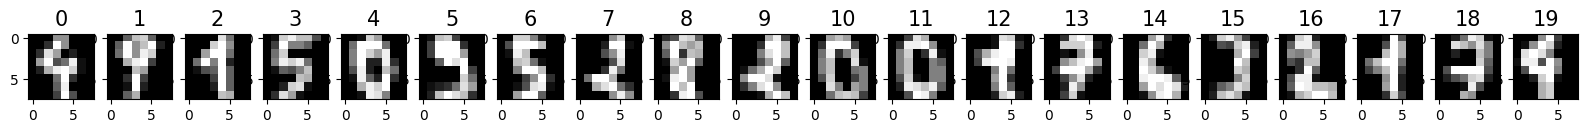

In [17]:
fig = plt.figure(figsize=(20, 4))
for index, image in enumerate(arr):
    plt.subplot(1, len(arr), index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title(f"{index}", fontsize=15)

In [18]:
r.list_signals("a646t6c76kvchvh2scld")

[id {
  signal_id: "images-values-known"
  execution_id {
    project: "flytesnacks"
    domain: "development"
    name: "a646t6c76kvchvh2scld"
  }
}
type {
  collection_type {
    simple: INTEGER
  }
}
]

In [20]:
my_labels = [round(random.random() * 10) for i in range(0, len(arr))]

In [21]:
my_labels

[8, 5, 10, 6, 8, 1, 6, 0, 6, 4, 2, 5, 8, 2, 5, 6, 9, 7, 9, 2]

In [22]:
r.set_signal("images-values-known", "a646t6c76kvchvh2scld", my_labels, python_type=typing.List[int])